<a href="https://colab.research.google.com/github/arivv22/Wearable-Sensor-based-Stress-Detection/blob/master/wearable_stress_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# Simulate Wearable Sensor Data

In [3]:
np.random.seed(42)
n_samples = 500

# Simulated features
heart_rate = np.random.normal(70, 10, n_samples)  # heart rate in bpm
steps = np.random.normal(3000, 800, n_samples)    # steps count
temperature = np.random.normal(36.5, 0.5, n_samples)  # skin temperature in Celsius

# Simulated target: stress level (0 = low, 1 = high)
# Let's assume higher HR and higher temp correlate with stress
stress_level = ((heart_rate > 75) & (temperature > 36.7)).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'heart_rate': heart_rate,
    'steps': steps,
    'temperature': temperature,
    'stress_level': stress_level
})

# Explore Data

In [4]:
print("Data Sample:")
print(df.head())

print("\nClass distribution:")
print(df['stress_level'].value_counts())

Data Sample:
   heart_rate        steps  temperature  stress_level
0   74.967142  3740.942038    37.199678             0
1   68.617357  4527.533312    36.962317             0
2   76.476885  1881.145941    36.529815             0
3   85.230299  3450.375389    36.176532             0
4   67.658466  2479.485945    36.849112             0

Class distribution:
stress_level
0    439
1     61
Name: count, dtype: int64


# Visualize Sensor Data

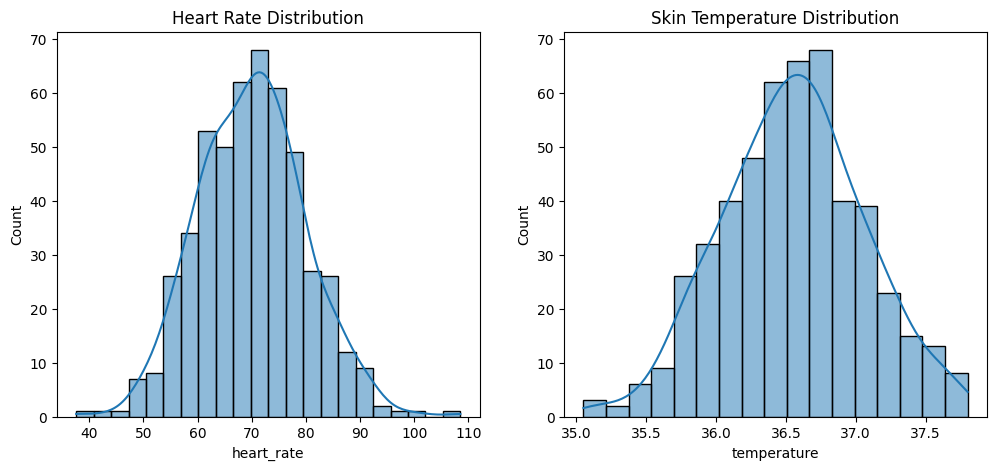

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['heart_rate'], kde=True)
plt.title("Heart Rate Distribution")

plt.subplot(1,2,2)
sns.histplot(df['temperature'], kde=True)
plt.title("Skin Temperature Distribution")
plt.show()

# Prepare Data for Modeling

In [6]:
X = df[['heart_rate', 'steps', 'temperature']]
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest Model

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate Model

In [8]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc*100:.2f}%")

Random Forest Accuracy: 99.00%


# Confusion Matrix

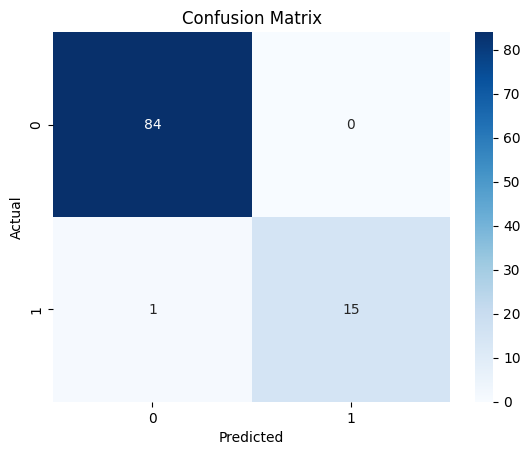

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize Heart Rate vs Stress

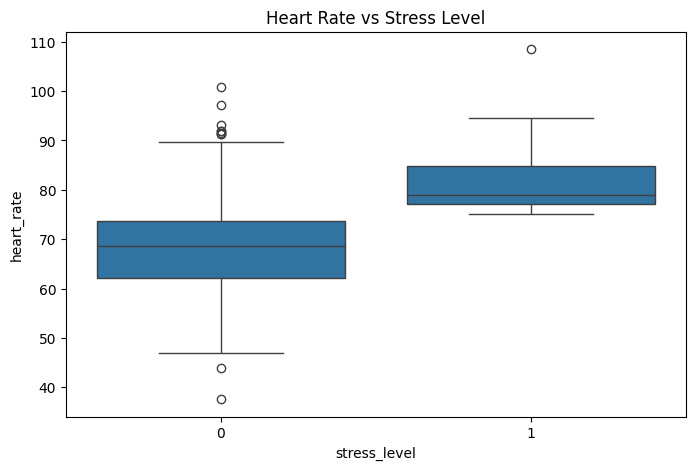

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='stress_level', y='heart_rate', data=df)
plt.title("Heart Rate vs Stress Level")
plt.show()

# Save Model

In [11]:
joblib.dump(model, "wearable_stress_model.pkl")
print("Model saved as wearable_stress_model.pkl")

Model saved as wearable_stress_model.pkl
